In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('data/test.csv')

In [3]:
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [4]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return ** 2))

def calculate_wap(df):
    a1 = df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1']
    a2 = df['bid_price2'] * df['ask_size2'] + df['ask_price2'] * df['bid_size2']
    b = df['bid_size1'] + df['ask_size1'] + df['bid_size2']+ df['ask_size2']
    return (a1 + a2)/ b

def realized_volatility_per_time_id(file_path, prediction_column_name):
    df_book_data = pd.read_parquet(file_path)
    df_book_data['wap'] = calculate_wap(df_book_data)
    df_book_data['log_return'] = df_book_data.groupby(['time_id'])['wap'].apply(log_return)
    df_book_data = df_book_data[~df_book_data['log_return'].isnull()]
    df_realized_vol_per_stock =  pd.DataFrame(df_book_data.groupby(['time_id'])['log_return'].agg(realized_volatility)).reset_index()
    df_realized_vol_per_stock = df_realized_vol_per_stock.rename(columns = {'log_return':prediction_column_name})
    stock_id = file_path.split('=')[1]
    df_realized_vol_per_stock['row_id'] = df_realized_vol_per_stock['time_id'].apply(lambda x:f'{stock_id}-{x}')
    return df_realized_vol_per_stock[['row_id', prediction_column_name]]

def past_realized_volatility_per_stock(list_file, prediction_column_name):
    df_past_realized = pd.DataFrame()
    for file in tqdm(list_file):
        df_past_realized = pd.concat([df_past_realized, realized_volatility_per_time_id(file, prediction_column_name)])
    return df_past_realized

In [5]:
book_ex = pd.read_parquet('data/book_train.parquet/stock_id=0')

In [7]:
realized_volatility_per_time_id('data/book_train.parquet/stock_id=0', 'pred_col_name')

,row_id,pred_col_name
0,0-5,0.004106
1,0-11,0.001507
2,0-16,0.002468
3,0-31,0.002708
4,0-62,0.001932
5,0-72,0.007003
6,0-97,0.009174
7,0-103,0.003920
8,0-109,0.001941
9,0-123,0.003317


In [13]:
book_ex['wap'] = calculate_wap(book_ex)
book_ex.groupby(['time_id'])['wap'].apply(log_return)

# df_name.groupby([집계 기준 변수들])[집계하고픈 변수].apply(함수)
# '집계 기준 변수' 에 따른 '집계하고픈 변수'의 '함수'값
# 중요한 메소드인 듯, 더 빠르게 dataframe 만들 수 있을 듯.

0                  NaN
1        -1.309440e-06
2         4.761387e-07
3         3.571622e-07
4         0.000000e+00
5        -3.571622e-07
6         3.571622e-07
7         0.000000e+00
8         0.000000e+00
9         0.000000e+00
10       -3.571622e-07
11        3.571622e-07
12        0.000000e+00
13        1.737976e-05
14        7.563209e-04
15       -1.717762e-04
16        2.736459e-06
17        1.412584e-03
18       -7.864903e-05
19       -3.424683e-04
20       -4.894270e-04
21       -1.403131e-05
22        1.949938e-04
23        2.710260e-04
24        1.093405e-04
25        1.102791e-04
26       -3.309930e-04
27        3.923068e-04
28        2.008048e-05
29        5.718318e-04
              ...     
917523   -6.493984e-05
917524    1.123886e-04
917525    1.277721e-04
917526    0.000000e+00
917527   -1.419766e-04
917528    7.078191e-05
917529   -2.602045e-05
917530    1.605402e-05
917531    0.000000e+00
917532    1.621965e-04
917533   -2.494245e-05
917534    0.000000e+00
917535    0

In [38]:
def log_return(col):
    return np.log(col).diff()

def wap_func(df):
    a1 = df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1']
    a2 = df['bid_price2'] * df['ask_size2'] + df['ask_price2'] * df['bid_size2']
    b = df['bid_size1'] + df['ask_size1'] + df['bid_size2']+ df['ask_size2']
    return (a1 + a2)/ b

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def up_ratio_func(col):
    return np.sum(col.diff()>0)/(len(book_df)-1)

def down_ratio_func(col):
    return np.sum(col.diff()<0)/(len(book_df)-1)

def skewness_func(col):
    return 3*(col.mean() - col.median())/col.std()

def right_skew_func(seconds_col):
    return (book_df[seconds_col>=300].seconds_in_bucket-300).sum()/((seconds_col>=300).sum())

def sizes_func(): ## 마지막 행의 size에 대해. 사실 더 많은 데이터를 사용하고싶은데 그럴수 있을지 모르겠음
    sizes = list(book_df.iloc[-1]['bid_size1' : 'ask_size2'])
    return sizes

def TR_func(WAP_col):
    return WAP_col.max() - WAP_col.min()

In [3]:
book_ex = pd.read_parquet('data/book_train.parquet/stock_id=0')
book_ex.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [9]:
book_ex['wap'] = wap_func(book_ex)
book_ex.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,wap
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,1.001420
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,1.001419
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,1.001419
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,1.001420
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,1.001420


In [12]:
book_ex['log_return'] = book_ex.groupby(['time_id'])['wap'].apply(log_return)

In [15]:
book_ex.iloc[299:305, :]

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,wap,log_return
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3,1.003729,0.000027
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3,1.003701,-0.000027
301,5,593,1.003129,1.003749,1.003025,1.003801,100,3,26,3,1.003729,0.000027
302,11,0,0.999473,1.000176,0.999423,1.000376,205,100,20,30,0.999925,NaN
303,11,3,0.999473,1.000176,0.999423,1.000376,200,100,20,30,0.999922,-0.000004
304,11,13,0.999473,1.000326,0.999423,1.000376,200,100,20,30,1.000008,0.000086


In [22]:
rea_v = book_ex.groupby(['time_id'])['log_return'].apply(realized_volatility)

In [20]:
book_time_5 = book_ex[book_ex['time_id']==5]
book_time_11 = book_ex[book_ex['time_id']==11]

In [31]:
realized_volatility(book_time_5.log_return)
# realized_volatility(book_time_11.log_return)

0.004105778

In [57]:
def wap(df):
    a1 = df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1']
    a2 = df['bid_price2'] * df['ask_size2'] + df['ask_price2'] * df['bid_size2']
    b = df['bid_size1'] + df['ask_size1'] + df['bid_size2']+ df['ask_size2']
    return (a1 + a2) / b

def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

def realized_volatility(series_log_return):  # only for wap column.
    return np.sqrt(np.sum(series_log_return**2))

def skewness(col_data):
    col_mean = col_data.mean()
    diff = col_data - col_mean
    return (diff**3).mean() / ((diff**2).mean())**(3/2)

def kurtosis(col_data):
    col_mean = col_data.mean()
    diff = col_data - col_mean
    return (diff**4).mean() / ((diff**2).mean())**2 - 3

def median_abs_deviation(col_data):
    col_median = col_data.median()
    abs_diff = np.abs(col_data-col_median)
    return abs_diff.median()

def right_skew(col_data): # only for seconds_in_bucket column.
    return (col_data[col_data>=300]-300).sum() / (col_data>=300).sum()

def TR(col_data):
    return col_data.max() - col_data.min()

# should remake this function for column data, not df data
def sizes_func(): ## 마지막 행의 size에 대해. 사실 더 많은 데이터를 사용하고싶은데 그럴수 있을지 모르겠음
    sizes = list(book_df.iloc[-1]['bid_size1' : 'ask_size2'])
    return sizes

In [149]:
# book data
book_ex0 = pd.read_parquet('data/book_train.parquet/stock_id=0')
method_list = [skewness, kurtosis]
book_ex0['wap'] = wap(book_ex0)
book_ex0['log_return'] = book_ex0.groupby(['time_id'])['wap'].apply(log_return)
new_df0 = book_ex0.groupby(['time_id']).agg({'log_return':realized_volatility,
                                  'seconds_in_bucket':['count',right_skew]+method_list,
                                  'wap':method_list,
                                  'bid_size1':[skewness,'max','mean'],
                                  'ask_size1':[skewness,'max','mean'],
                                  'bid_size2':skewness,
                                  'ask_size2':skewness})

new_df0.reset_index(inplace = True)
new_df0['row_id'] = new_df0['time_id'].apply(lambda x: str('0-{}'.format(x)))
new_df0.drop(['time_id'], axis = 1, inplace = True)
new_df0.head()
new_df0.columns = ['realized_volatility', 'seconds_count','seconds_right_skew',
                   'seconds_skewness','seconds_kurtosis','wap_skewness','wap_kurtosis',
                   'bid_size1_skewness','bid_size1_max','bid_size1_mean',
                   'ask_size1_skewness','ask_size1_max','ask_size1_mean',
                   'bid_size2_skewness','ask_size2_skewness','row_id']

# trade data
trade_ex0 = pd.read_parquet('data/trade_train.parquet/stock_id=0')
trade_ex0['log_return'] = trade_ex0.groupby(['time_id'])['price'].apply(log_return)
new_df_trade = trade_ex0.groupby(['time_id']).agg({
                                    'size':['max','sum'],
                                    'order_count':'max'})

new_df_trade.reset_index(inplace = True)
new_df_trade['row_id'] = new_df_trade['time_id'].apply(lambda x: str('0-{}'.format(x)))
new_df_trade.drop(['time_id'], axis = 1, inplace = True)
new_df_trade.head()
new_df_trade.columns = ['size_max','size_sum',
                        'order_count_max','row_id']

new_df = pd.merge(new_df0, new_df_trade, how='outer', on='row_id')
new_df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max
0,0.004106,302,152.841727,0.132678,-1.181185,-1.760223,3.300160,1.576864,500,78.264901,0.597447,228,74.579470,1.184807,0.331478,0-5,499,3179,12
1,0.001507,200,147.965217,-0.182136,-1.001272,0.457949,0.563174,0.155938,402,149.965000,2.028765,400,71.145000,1.005241,1.403907,0-11,280,1289,6
2,0.002468,188,159.897059,0.341495,-1.216982,-1.049219,0.324836,0.588568,304,96.132979,1.186787,449,131.037234,0.513211,0.970648,0-16,391,2161,8
3,0.002708,120,120.509434,0.249224,-1.013334,0.822363,0.111513,0.612172,370,114.458333,0.443159,400,120.800000,1.606035,0.637382,0-31,450,1962,15
4,0.001932,176,131.988764,-0.024891,-1.151718,0.166911,-1.067718,0.830728,402,119.823864,1.064656,333,88.477273,0.766731,2.307597,0-62,341,1791,17


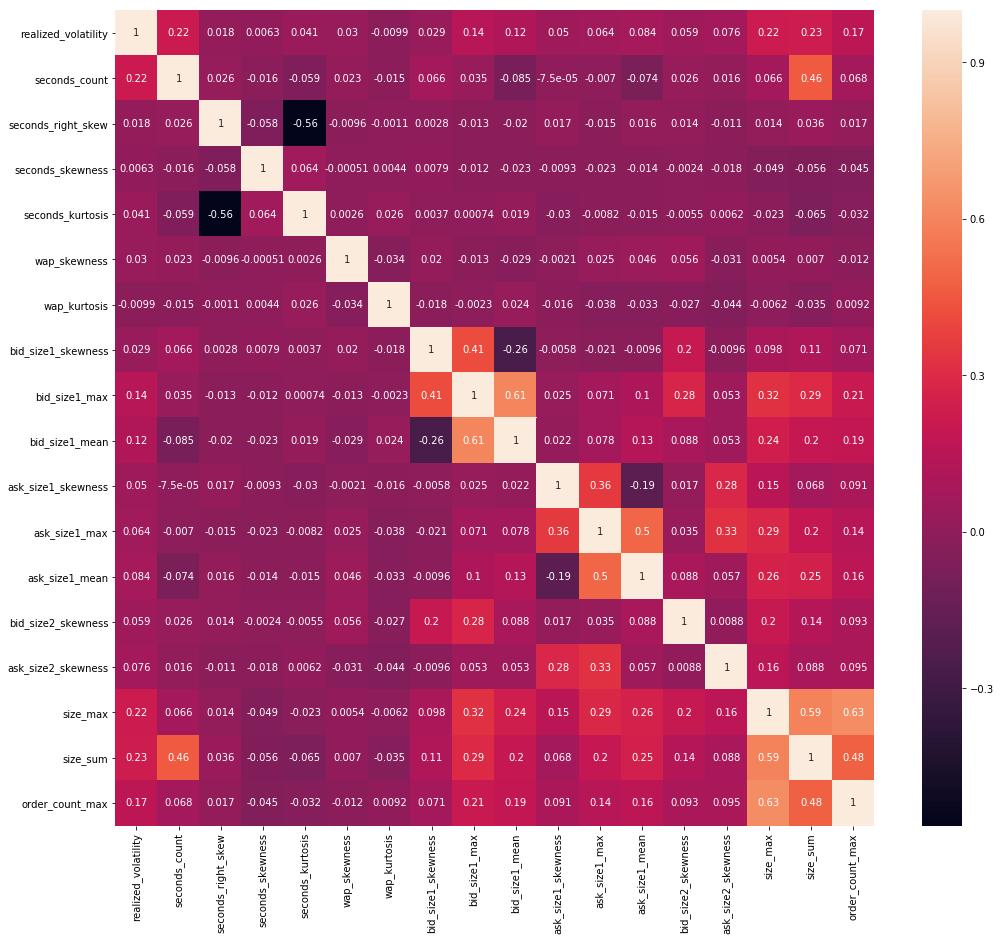

In [150]:
plt.figure(figsize = (17, 15))
sns.heatmap(new_df.corr(), annot = True)

In [152]:
list(new_df.columns)

['realized_volatility',
 'seconds_count',
 'seconds_right_skew',
 'seconds_skewness',
 'seconds_kurtosis',
 'wap_skewness',
 'wap_kurtosis',
 'bid_size1_skewness',
 'bid_size1_max',
 'bid_size1_mean',
 'ask_size1_skewness',
 'ask_size1_max',
 'ask_size1_mean',
 'bid_size2_skewness',
 'ask_size2_skewness',
 'row_id',
 'size_max',
 'size_sum',
 'order_count_max']

In [144]:
book_ex1 = pd.read_parquet('data/book_train.parquet/stock_id=1')
method_list = [skewness, kurtosis]
book_ex1['wap'] = wap(book_ex1)
book_ex1['log_return'] = book_ex1.groupby(['time_id'])['wap'].apply(log_return)
new_df1 = book_ex1.groupby(['time_id']).agg({'log_return':realized_volatility,
                                  'seconds_in_bucket':['count',right_skew]+method_list,
                                  'wap':method_list,
                                  'bid_size1':[skewness,'max','mean'],
                                  'ask_size1':[skewness,'max','mean'],
                                  'bid_size2':skewness,
                                  'ask_size2':skewness})

trade_ex1 = pd.read_parquet('data/trade_train.parquet/stock_id=1')
new_df_trade = trade_ex0.groupby(['time_id']).agg({'price':realized_volatility,
                                    'size':['max','sum'],
                                    'order_count':['max','sum']})


new_df1.reset_index(inplace = True)
new_df1['row_id'] = new_df1['time_id'].apply(lambda x: str('1-{}'.format(x)))
new_df1.drop(['time_id'], axis = 1, inplace = True)
new_df1.head()

KeyboardInterrupt: 

In [106]:
df01 = pd.concat([new_df0, new_df1], axis=0)
df01.head()

log_return seconds_in_bucket                                  \
  realized_volatility             count  right_skew  skewness  kurtosis   
0            0.004106               302  152.841727  0.132678 -1.181185   
1            0.001507               200  147.965217 -0.182136 -1.001272   
2            0.002468               188  159.897059  0.341495 -1.216982   
3            0.002708               120  120.509434  0.249224 -1.013334   
4            0.001932               176  131.988764 -0.024891 -1.151718   

        wap           bid_size1                  ask_size1                   \
   skewness  kurtosis  skewness  max        mean  skewness  max        mean   
0 -1.760223  3.300160  1.576864  500   78.264901  0.597447  228   74.579470   
1  0.457949  0.563174  0.155938  402  149.965000  2.028765  400   71.145000   
2 -1.049219  0.324836  0.588568  304   96.132979  1.186787  449  131.037234   
3  0.822363  0.111513  0.612172  370  114.458333  0.443159  400  120.800000   
4  0.166911 -1.067718  0.830728  402  119.823864  1.064656  333   88.477273   

  bid_size2 ask_size2 row_id  
   skewness  skewness         
0  1.184807  0.331478    0-5  
1  1.005241  1.403907   0-11  
2  0.513211  0.970648   0-16  
3  1.606035  0.637382   0-31  
4  0.766731  2.307597   0-62

In [107]:
print(len(new_df0))
print(len(new_df1))
print(len(df01))
print(df01.iloc[len(new_df0)-5:len(new_df0)+5, :])

3830
3830
7660
              log_return seconds_in_bucket                                  \
     realized_volatility             count  right_skew  skewness  kurtosis   
3825            0.002330               297  134.866667 -0.084540 -1.048208   
3826            0.001920               206  139.310000  0.041659 -1.106158   
3827            0.002346               188  167.086538 -0.153240 -1.445028   
3828            0.003036               307  143.576687 -0.073818 -1.237886   
3829            0.001715               228  146.403509  0.004337 -1.340418   
0               0.005987               575  147.876761  0.020307 -1.175018   
1               0.002025               370  147.360000  0.052674 -1.235497   
2               0.002539               353  151.727749 -0.121930 -1.238077   
3               0.003192               171  149.867647  0.447248 -1.042971   
4               0.002751               227  160.743590 -0.059902 -1.258272   

           wap           bid_size1              

In [96]:
new_df.head()

log_return seconds_in_bucket                                  \
  realized_volatility             count  right_skew  skewness  kurtosis   
0            0.004106               302  152.841727  0.132678 -1.181185   
1            0.001507               200  147.965217 -0.182136 -1.001272   
2            0.002468               188  159.897059  0.341495 -1.216982   
3            0.002708               120  120.509434  0.249224 -1.013334   
4            0.001932               176  131.988764 -0.024891 -1.151718   

        wap           bid_size1 ask_size1 bid_size2 ask_size2 row_id  
   skewness  kurtosis  skewness  skewness  skewness  skewness         
0 -1.760223  3.300160  1.576864  0.597447  1.184807  0.331478    0-5  
1  0.457949  0.563174  0.155938  2.028765  1.005241  1.403907   0-11  
2 -1.049219  0.324836  0.588568  1.186787  0.513211  0.970648   0-16  
3  0.822363  0.111513  0.612172  0.443159  1.606035  0.637382   0-31  
4  0.166911 -1.067718  0.830728  1.064656  0.766731  2.307597   0-62

In [59]:
merged_df = pd.read_csv('data/train_data2.csv').drop('Unnamed: 0', axis=1)

In [60]:
merged_df.head()

,stock_id,time_id,total_ratio,real_vol,skewness,right_skew,book_row_num,bid_size1,ask_size1,bid_size2,ask_size2,traded_size,trade_TR,max_size,max_size_price,max_price,max_price_size,target
0,0.0,5.0,0.830565,0.004499,-0.853566,152.841727,301.0,100.0,3.0,26.0,3.0,3179.0,0.002379,499.0,1.003191,1.004680,3.0,0.004136
1,0.0,11.0,0.723618,0.001204,0.083303,147.965217,199.0,2.0,32.0,120.0,52.0,1289.0,0.001104,280.0,1.000072,1.000828,1.0,0.001445
2,0.0,16.0,0.684492,0.002369,-0.958658,159.897059,187.0,5.0,100.0,2.0,1.0,2161.0,0.003064,391.0,0.998577,1.000455,10.0,0.002168
3,0.0,31.0,0.621849,0.002574,0.691764,120.509434,119.0,25.0,200.0,36.0,62.0,1962.0,0.002259,450.0,0.997972,1.000231,14.5,0.002195
4,0.0,62.0,0.691429,0.001894,0.378480,131.988764,175.0,102.0,12.0,3.0,7.0,1791.0,0.000792,341.0,0.999427,1.000023,1.0,0.001747


In [71]:
new_df.corr()[new_df.corr()>=0.8].index

MultiIndex(levels=[['log_return', 'seconds_in_bucket', 'bid_price1', 'ask_price1', 'bid_price2', 'ask_price2', 'bid_size1', 'ask_size1', 'bid_size2', 'ask_size2'], ['count', 'kurtosis', 'median_abs_deviation', 'realized_volatility', 'right_skew', 'skewness']],
           codes=[[0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9], [3, 0, 4, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2]])

In [115]:
new_df0.head()

log_return seconds_in_bucket                                  \
  realized_volatility             count  right_skew  skewness  kurtosis   
0            0.004106               302  152.841727  0.132678 -1.181185   
1            0.001507               200  147.965217 -0.182136 -1.001272   
2            0.002468               188  159.897059  0.341495 -1.216982   
3            0.002708               120  120.509434  0.249224 -1.013334   
4            0.001932               176  131.988764 -0.024891 -1.151718   

        wap           bid_size1                  ask_size1                   \
   skewness  kurtosis  skewness  max        mean  skewness  max        mean   
0 -1.760223  3.300160  1.576864  500   78.264901  0.597447  228   74.579470   
1  0.457949  0.563174  0.155938  402  149.965000  2.028765  400   71.145000   
2 -1.049219  0.324836  0.588568  304   96.132979  1.186787  449  131.037234   
3  0.822363  0.111513  0.612172  370  114.458333  0.443159  400  120.800000   
4  0.166911 -1.067718  0.830728  402  119.823864  1.064656  333   88.477273   

  bid_size2 ask_size2 row_id  
   skewness  skewness         
0  1.184807  0.331478    0-5  
1  1.005241  1.403907   0-11  
2  0.513211  0.970648   0-16  
3  1.606035  0.637382   0-31  
4  0.766731  2.307597   0-62

In [129]:
new_df0.columns = ['realized_volatility', 'seconds_count','seconds_right_skew',
                   'seconds_skewness','seconds_kurtosis','wap_skewness','wap_kurtosis',
                   'bid_size1_skewness','bid_size1_max','bid_size1_mean',
                   'ask_size1_skewness','ask_size1_max','ask_size1_mean',
                   'bid_size2_skewness','ask_size2_skewness','row_id']
new_df0.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id
0,0.004106,302,152.841727,0.132678,-1.181185,-1.760223,3.300160,1.576864,500,78.264901,0.597447,228,74.579470,1.184807,0.331478,0-5
1,0.001507,200,147.965217,-0.182136,-1.001272,0.457949,0.563174,0.155938,402,149.965000,2.028765,400,71.145000,1.005241,1.403907,0-11
2,0.002468,188,159.897059,0.341495,-1.216982,-1.049219,0.324836,0.588568,304,96.132979,1.186787,449,131.037234,0.513211,0.970648,0-16
3,0.002708,120,120.509434,0.249224,-1.013334,0.822363,0.111513,0.612172,370,114.458333,0.443159,400,120.800000,1.606035,0.637382,0-31
4,0.001932,176,131.988764,-0.024891,-1.151718,0.166911,-1.067718,0.830728,402,119.823864,1.064656,333,88.477273,0.766731,2.307597,0-62


In [117]:
trade_ex0 = pd.read_parquet('data/trade_train.parquet/stock_id=0')

In [134]:
new_df_trade = trade_ex0.groupby(['time_id']).agg({'price':realized_volatility,
                                    'size':['max','mean','sum'],
                                    'order_count':['max','mean','sum']})

In [135]:
new_df_trade

price  size                    order_count            \
        realized_volatility   max        mean    sum         max      mean   
time_id                                                                      
5                  6.348098   499   79.475000   3179          12  2.750000   
11                 5.478355   280   42.966667   1289           6  1.900000   
16                 4.996022   391   86.440000   2161           8  2.720000   
31                 3.869189   450  130.800000   1962          15  3.933333   
62                 4.688625   341   81.409091   1791          17  4.045455   
72                 5.089525   438  130.576923   3395          16  3.730769   
97                 7.186189   308   43.826923   2279           9  2.192308   
103                5.290483   334   42.178571   1181          16  2.071429   
109                6.717637   362   41.511111   1868           6  1.888889   
123                8.000097   468   80.234375   5135          13  2.906250   
128                5.750255   492  132.878788   4385          22  4.272727   
146                5.581112   597   97.483871   3022          16  3.709677   
147                5.825645   360   58.294118   1982          20  3.558824   
152                4.897750   508  162.000000   3888          12  4.291667   
157                5.553902   425  105.064516   3257           9  2.741935   
159                7.068515  1263  129.900000   6495          24  3.260000   
169                4.468632   611  115.350000   2307          13  3.850000   
207                6.184503   624  131.868421   5011          14  4.184211   
211                5.645069   324   54.312500   1738          29  3.406250   
213                3.749085   531   90.500000   1267          20  3.357143   
218                6.408534   717  114.170732   4681          16  3.195122   
227                5.822599   504   79.970588   2719           8  2.470588   
229                5.474015   213   74.400000   2232           6  2.533333   
232                8.673839   499   88.618421   6735          13  3.447368   
250                5.572630   801  104.225806   3231          12  3.548387   
254                5.445090   905  202.900000   6087          17  4.366667   
256                5.645521   185   32.625000   1044          11  2.187500   
266                5.832550   635  122.205882   4155          15  3.617647   
273                5.096266  1128  208.500000   5421          22  4.538462   
289                9.312057   512  134.482759  11700          20  3.781609   
...                     ...   ...         ...    ...         ...       ...   
32611              4.476895   343  123.850000   2477           9  3.600000   
32614              3.469703   798  193.500000   2322          17  4.250000   
32631              4.481099   501  125.000000   2500          11  2.650000   
32635              6.410716   538  123.317073   5056          13  3.048780   
32639              5.373291   827  110.241379   3197          18  3.413793   
32646              3.598224   400  161.538462   2100           9  4.076923   
32649              5.936336  1394  156.916667   5649          29  4.444444   
32653              5.091931   490  117.807692   3063          11  3.153846   
32654              6.499773   287   66.785714   2805           9  2.904762   
32662              6.632456   361   65.113636   2865          10  2.840909   
32676              6.556506   404  129.348837   5562           8  2.953488   
32680              6.548237   318   61.418605   2641          11  3.418605   
32686              5.293471   309   51.178571   1433           7  2.071429   
32690              4.479005   900  261.550000   5231          15  4.850000   
32692              6.556913   527   70.953488   3051          12  2.906977   
32693              5.905905   388   43.828571   1534           8  2.314286   
32704              5.902773   839  141.600000   4956          16  3.714286   
32709              6.088071   205   37.29729

In [136]:
new_df_trade.reset_index(inplace = True)
new_df_trade['row_id'] = new_df_trade['time_id'].apply(lambda x: str('0-{}'.format(x)))
new_df_trade.drop(['time_id'], axis = 1, inplace = True)
new_df_trade.head()
new_df_trade.columns = ['price_rv','size_max','size_mean','size_sum','order_count_max','order_count_mean','order_count_sum','row_id']

In [137]:
new_df_trade.head()

,price_rv,size_max,size_mean,size_sum,order_count_max,order_count_mean,order_count_sum,row_id
0,6.348098,499,79.475000,3179,12,2.750000,110,0-5
1,5.478355,280,42.966667,1289,6,1.900000,57,0-11
2,4.996022,391,86.440000,2161,8,2.720000,68,0-16
3,3.869189,450,130.800000,1962,15,3.933333,59,0-31
4,4.688625,341,81.409091,1791,17,4.045455,89,0-62
